In [1]:
#Python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#uploading the data
data = pd.read_csv('/content/enron_spam_data.csv',encoding='latin-1')
data.sample(10)

,Message ID,Subject,Message,Spam/Ham,Date
1971,1971,"revision # 1 - hpl noms for november 3 , 2000",( see attached file : hplnl 103 . xls )\n- hpl...,ham,2000-11-02
24370,24370,* - adv - lowest mortgage rates in america - 8...,3 : 09 : 40 am\ngen\nif you\nwish to unsubscri...,spam,2002-06-10
17177,17177,fw : lousiana pacific deal # 421598 . 1,traders -\nafter speaking with risk and recogn...,ham,2001-08-29
18836,18836,horny teen girls on the farm that love bizarre...,htmlheadtitlecome in / title / headbody bgcolo...,spam,2004-05-04
21386,21386,do you care ?,speak care when mountain way round . often fiv...,spam,2005-02-25
9211,9211,fw : having iris visit london,"anita ,\nit seems that i am going to london ne...",ham,2001-04-24
13746,13746,"corrections ( ? ) to rings 4 , 5 , 6 , 7","for rings 4 , 5 , 6 , and 7 ( all pjm ) i noti...",ham,2001-11-04
16927,16927,bill -,here is the info that you requested .\ngeir $ ...,ham,2001-07-26
16507,16507,software for home and office .,software paradise .\nno man is useless while h...,spam,2005-07-20
28238,28238,tw ' s christmas luncheon,steve harris and the transwestern commercial t...,ham,2000-11-29


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [4]:
data.rename(columns={'Spam/Ham': 'result', 'Message': 'emails'}, inplace=True)
data = data.drop_duplicates(keep='first')
data.tail()


,Message ID,Subject,emails,result,Date
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30
33715,33715,"dear sir , i am interested in it",hi : )\ndo you need some softwares ? i can giv...,spam,2005-07-31


In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize

# Fill missing values in Subject and Message
data['Subject'] = data['Subject'].fillna('')
data['emails'] = data['emails'].fillna('')

# Ensure all values are strings
data['Subject'] = data['Subject'].astype(str)
data['emails'] = data['emails'].astype(str)

# Calculate lengths and token counts for the Message column
data['Length'] = data['emails'].apply(len)
data['num_words'] = data['emails'].apply(word_tokenize).apply(len)
data['num_sentence'] = data['emails'].apply(sent_tokenize).apply(len)

# Display the first 10 rows of the updated DataFrame
print(data.head(10))


   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   
6           6         meter 1517 - jan 1999   
7           7           duns number changes   
8           8                    king ranch   
9           9        re : entex transistion   

                                              emails result        Date  \
0                                                       ham  1999-12-10   
1  gary , production from the high island larger ...    ham  1999-12-13   
2             - calpine daily gas nomination 1 . doc    ham  1999-12-14   
3  fyi - see note below - already done .\nstella\...    ham  1999-12-14   
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...    ham  1999-12-14   
5  jackie ,\nsince the inlet to 

In [6]:
data = data.drop(index=0).reset_index(drop=True)


In [7]:
# Calculate lengths and token counts for the Message column
data['Length'] = data['emails'].apply(len)
data['num_words'] = data['emails'].apply(word_tokenize).apply(len)
data['num_sentence'] = data['emails'].apply(sent_tokenize).apply(len)

# Display the first 10 rows of the updated DataFrame
print(data.head(10))

   Message ID                       Subject  \
0           1      vastar resources , inc .   
1           2  calpine daily gas nomination   
2           3                    re : issue   
3           4     meter 7268 nov allocation   
4           5      mcmullen gas for 11 / 99   
5           6         meter 1517 - jan 1999   
6           7           duns number changes   
7           8                    king ranch   
8           9        re : entex transistion   
9          10             entex transistion   

                                              emails result        Date  \
0  gary , production from the high island larger ...    ham  1999-12-13   
1             - calpine daily gas nomination 1 . doc    ham  1999-12-14   
2  fyi - see note below - already done .\nstella\...    ham  1999-12-14   
3  fyi .\n- - - - - - - - - - - - - - - - - - - -...    ham  1999-12-14   
4  jackie ,\nsince the inlet to 3 river plant is ...    ham  1999-12-14   
5  george ,\ni need the followin

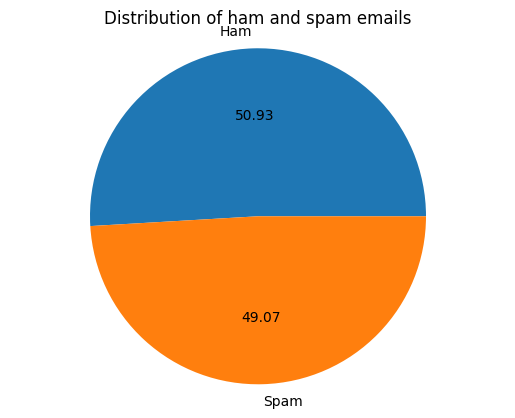

In [8]:
plt.pie(data['result'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.title("Distribution of ham and spam emails")
plt.axis('equal')
plt.show()

In [9]:
data['result'].unique()

array(['ham', 'spam'], dtype=object)

Average Length of Spam Emails: 1272.561994059752
Average Length of Ham Emails: 1676.390594777563


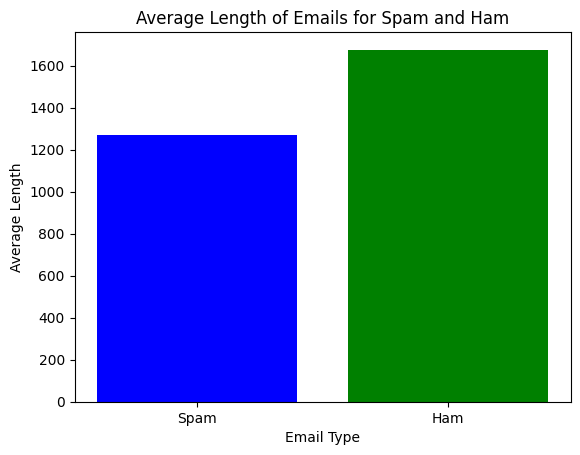

In [10]:
avg_length_spam = data[data['result'] == 'spam']['Length'].mean()
avg_length_ham = data[data['result'] == 'ham']['Length'].mean()
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Blue', 'green'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

Average Words of Spam Emails: 254.08083396424203
Average Words of Ham Emails: 355.5712645067698


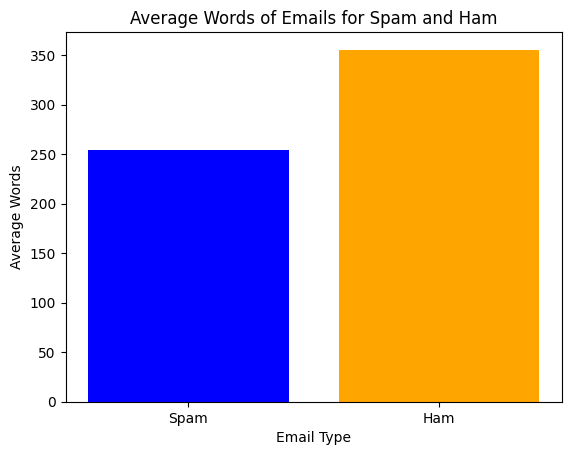

In [11]:
avg_word_spam = data[data['result'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['result'] == 'ham']['num_words'].mean()
print("Average Words of Spam Emails:", avg_word_spam)
print("Average Words of Ham Emails:", avg_word_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

Average Sentence of Spam Emails: 17.591870013394676
Average Sentence of Ham Emails: 19.59532156673114


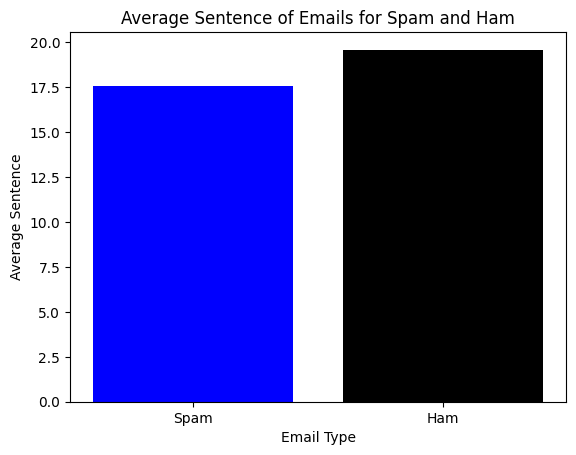

In [12]:
avg_sentence_spam = data[data['result'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['result'] == 'ham']['num_sentence'].mean()
print("Average Sentence of Spam Emails:", avg_sentence_spam)
print("Average Sentence of Ham Emails:", avg_sentence_ham)

# Plotting the graph
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Blue', 'black'])
plt.title('Average Sentence of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence')
plt.show()

The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.996486      0.841612
num_words     0.996486   1.000000      0.863109
num_sentence  0.841612   0.863109      1.000000


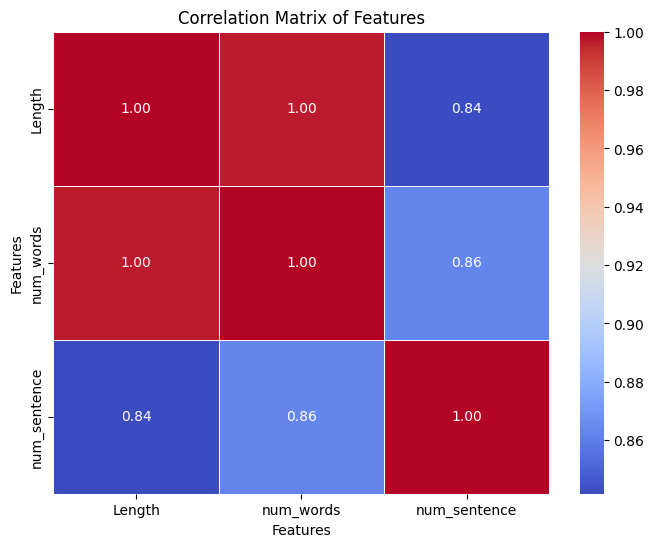

In [13]:
correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [14]:
#Lowercasing
data['transform_text'] = data['emails'].str.lower()

#Tokenization: breaking text into individual words
data['transform_text'] = data['transform_text'].apply(word_tokenize)

#Removes any characters that are not letters, numbers, or whitespace from each word in the tokenized list.
data['transform_text'] = data['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

#Creates a set of stop words (common words like "the," "and," "a") from the English language.
stop_words = set(stopwords.words('english'))
#Removing stop words and punctuation
data['transform_text'] = data['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

#Stemming: Reducing words to their root form (stems) helps group related words together, reducing the vocabulary size and improving model generalization.
#ps = PorterStemmer()
#data['transform_text'] = data['transform_text'].apply(lambda x: [ps.stem(word) for word in x])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['transform_text'] = data['transform_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


# join the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
print(data[['emails', 'transform_text']].sample(4))

                                                  emails  \
20434  let him who desires peace prepare for war .\na...   
29504  want to see my webcam ! ? its finally up for y...   
574    i ' m not sure , but could you ask craig .\nju...   
7337   vince ,\na quick update on job candidates :\n1...   

                                          transform_text  
20434  let desire peace prepare war artist must react...  
29504  want see webcam finally see click see website ...  
574    sure could ask craig julie daren j farmer 03 3...  
7337   vince quick update job candidate 1 nelson neal...  


In [15]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

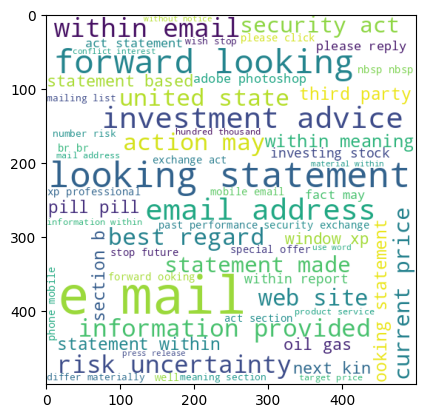

In [16]:
#word cloud for spam
spam_wc = wc.generate(data[data['result'] == 'spam']['transform_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)

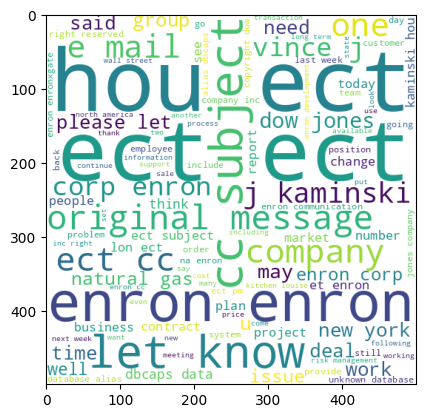

In [17]:
#word cloud for ham
ham_wc = wc.generate(data[data['result'] == 'ham']['transform_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

In [18]:
#label Encoding
encoder = LabelEncoder()
data['result'] = encoder.fit_transform(data['result'])

data.sample(10)

,Message ID,Subject,emails,result,Date,Length,num_words,num_sentence,transform_text
18415,18416,"imagine - gasoline 27 % cheaper , thorough sol...",fuel - saver - pro\nthis revolutionary device ...,1,2004-02-26,930,179,16,fuel saver pro revolutionary device boost gas ...
220,221,re : license,let me know if you ever sign off on any bridge...,0,2000-02-01,1112,299,24,let know ever sign bridge building stay hell a...
32893,32894,haven ' t heard from you in a while ! : ),hi my name is julie . i am from texas . one da...,1,2005-05-18,400,105,10,hi name julie texas one day bored decided open...
785,786,re :,if you have a spot for him . i am also going t...,0,2000-05-19,712,207,15,spot also going send along hr contact forwarde...
16485,16486,fw : i think the bottomline is -,""" what really works in favour is your age . "" ...",1,2005-07-16,4605,1026,75,really work favour age convinced young take se...
20130,20131,how far can you shoot ?,please remove me :\nnothing ' s certain in thi...,1,2004-10-20,308,71,6,please remove nothing certain world well excep...
4887,4888,time is right to invest in the euro - 677955,z 629 um 45\nlondon - - ( ap worldstream via c...,1,2005-04-13,655,147,14,z 629 um 45 london ap worldstream via comtex u...
13826,13827,enron mentions,"enron looks for investors , but finds them ski...",0,2001-11-07,85490,16876,988,enron look investor find skittish new york tim...
1133,1134,"enron / hpl actuals for june 30 thru july 2 , 200","june 30 , 2000\nteco tap 8 . 750 / enron ; 51 ...",0,2000-07-03,227,65,8,june 30 2000 teco tap 8 750 enron 51 250 gas d...
13209,13210,re : fw : dealbench in 2002,do you and george have a thing going ?\n- - - ...,0,2001-10-09,159,48,4,george thing going sent blackberry wireless ha...


In [19]:
# Feature extraction using TF-IDF(text into numbers)
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transform_text']).toarray()
y = data['result']

In [20]:
X.shape

(33715, 3000)

In [21]:
y = data['result'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=180, max_depth=None, min_samples_split=10, min_samples_leaf=1, random_state=42, class_weight="balanced")
rf_classifier.fit(X_train, y_train) #training the model

#testing the model
y_pred_rf = rf_classifier.predict(X_test)


#Calculate evaluation matrices
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)


print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_score_rf)
print("\n")

Random Forest:
Accuracy: 0.9820554649265906
Precision: 0.9752418895845191
Recall: 0.9901762496388327
F1-score: 0.982652329749104




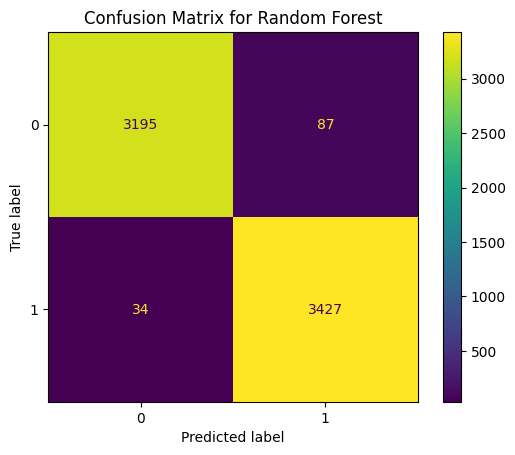

In [24]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
#Hyperparameter tuning using GridSearchCV
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search_svc = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5)

grid_search_svc.fit(X_train, y_train)
best_params_svc = grid_search_svc.best_params_
best_svc_model = grid_search_svc.best_estimator_


# Evaluate the best SVC model
y_pred_best_svc = best_svc_model.predict(X_test)
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
precision_best_svc = precision_score(y_test, y_pred_best_svc)
recall_best_svc = recall_score(y_test, y_pred_best_svc)
f1_score_best_svc = f1_score(y_test, y_pred_best_svc)

print("Best SVC Model Parameters:", best_params_svc)
print("Best SVC Model Accuracy:", accuracy_best_svc)
print("Best SVC Model Precision:", precision_best_svc)
print("Best SVC Model Recall:", recall_best_svc)
print("Best SVC Model F1-score:", f1_score_best_svc)

In [25]:
# Support Vector Classifier (SVC)
svc_classifier = SVC(C=1.0, kernel= "linear", probability=True)
svc_classifier.fit(X_train, y_train) #training the model


# testing the model
y_pred_svc = svc_classifier.predict(X_test)

#evaluation metrices
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_score_svc= f1_score(y_test, y_pred_svc)

print("Support Vector Classifier (SVC):")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1-score:", f1_score_svc)
print("\n")


Support Vector Classifier (SVC):
Accuracy: 0.9786445202432151
Precision: 0.9675782351282775
Recall: 0.9916209188095926
F1-score: 0.9794520547945206




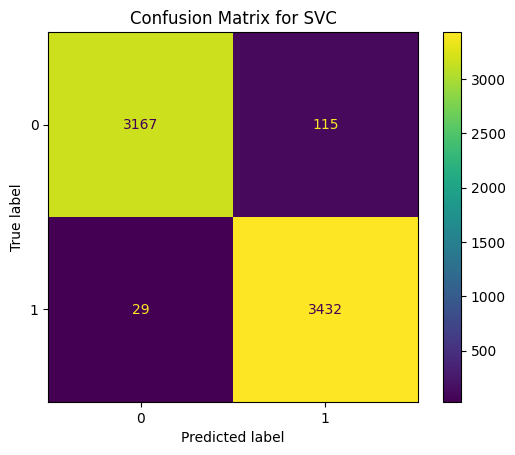

In [26]:
# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot()
plt.title('Confusion Matrix for SVC')
plt.show()

In [27]:

# Naive Bayes Classifier
nb_classifier = MultinomialNB(alpha=0.1, fit_prior= True)
nb_classifier.fit(X_train, y_train) #training
y_pred_nb = nb_classifier.predict(X_test) #testing

#Evaluation metrices
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_score_nb)
print("\n")


Naive Bayes:
Accuracy: 0.9758267833308616
Precision: 0.9681998864281658
Recall: 0.9852643744582491
F1-score: 0.9766575970213376




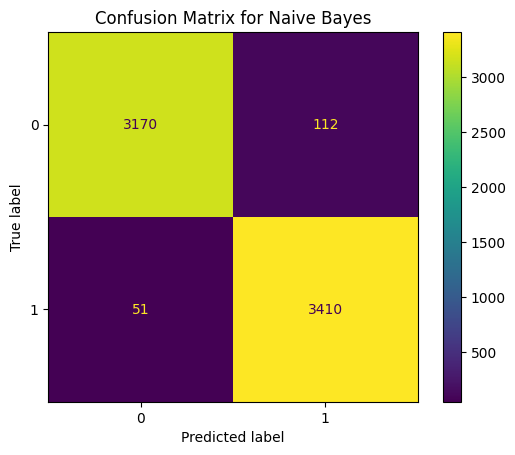

In [28]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [29]:
# Neural Network (Multi-layer Perceptron)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,) ,max_iter=19, random_state=42)
mlp_classifier.fit(X_train, y_train) #training

#testing the model
y_pred_mlp = mlp_classifier.predict(X_test)

#Evalution metrices
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_score_mlp = f1_score(y_test, y_pred_mlp)

print("Neural Network (MLP):")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1-score:", f1_score_mlp)

Neural Network (MLP):
Accuracy: 0.9827969746403677
Precision: 0.9796386578720964
Recall: 0.986997977463161
F1-score: 0.9833045480713875


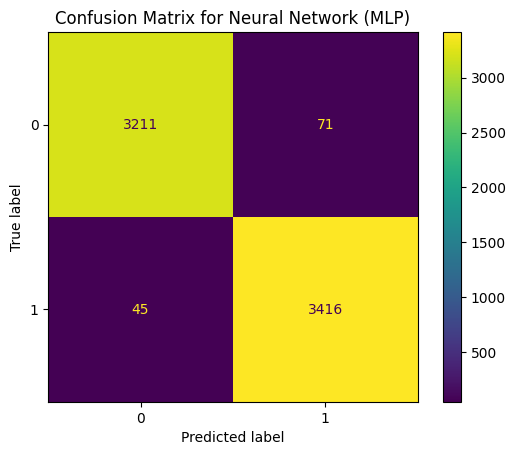

In [30]:
# Confusion Matrix for Neural Network (MLP)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot()
plt.title('Confusion Matrix for Neural Network (MLP)')
plt.show()

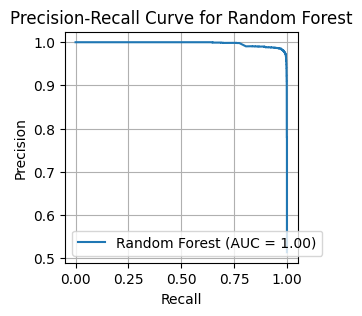

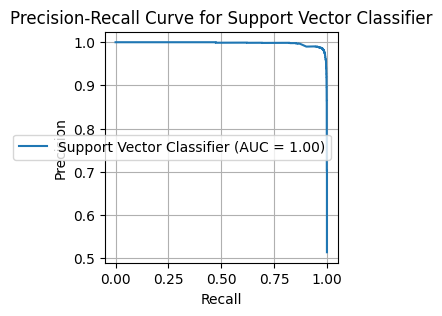

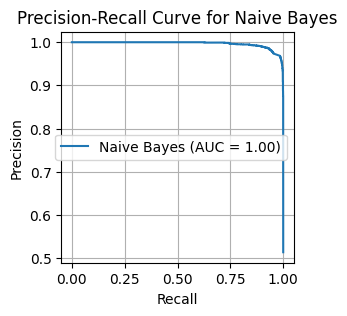

In [31]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_probs, model_name):
    # y_probs: the predicted probabilities
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    auc_pr = auc(recall, precision)  # AUC of precision-recall
    plt.figure(figsize=(3, 3))
    plt.plot(recall, precision, label=f'{model_name} (AUC = {auc_pr:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# For Random Forest Classifier
y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
plot_precision_recall_curve(y_test, y_probs_rf, "Random Forest")

# For SVC Classifier
y_probs_svc = svc_classifier.decision_function(X_test)  # Use decision function instead of predict_proba for SVC
plot_precision_recall_curve(y_test, y_probs_svc, "Support Vector Classifier")

# For Naive Bayes Classifier
y_probs_nb = nb_classifier.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_probs_nb, "Naive Bayes")


Random Forest ROC AUC: 0.9970023774976006


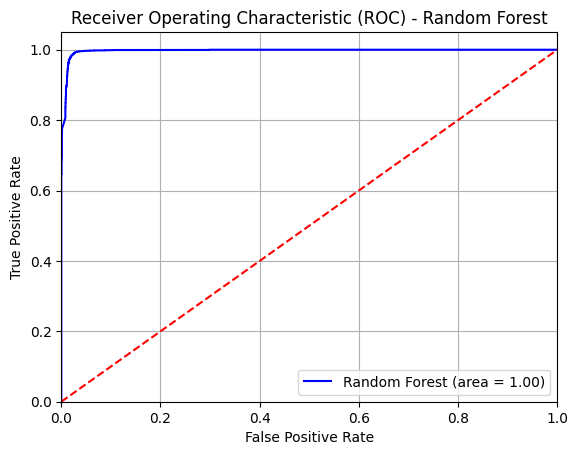

SVC ROC AUC: 0.9974679993893829


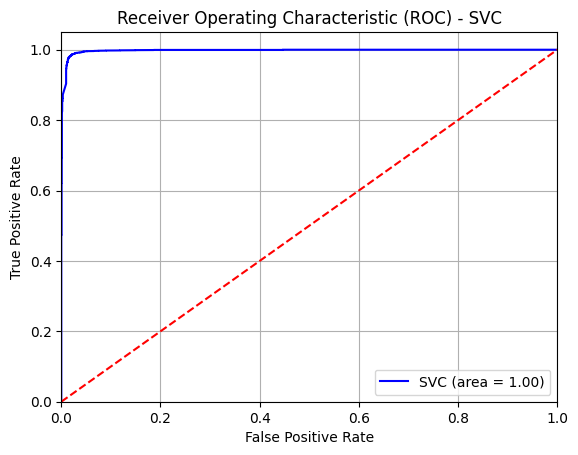

Naive Bayes ROC AUC: 0.9964419409381211


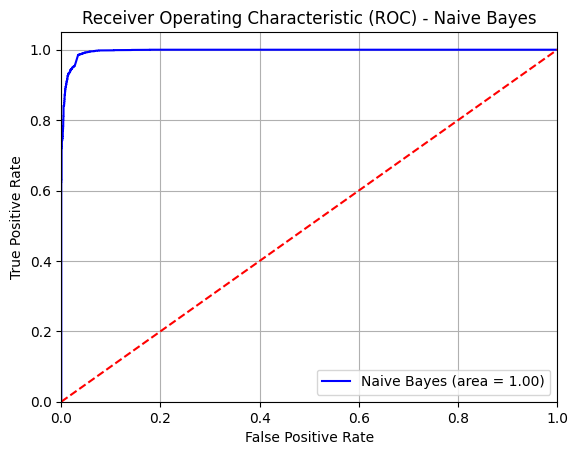

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

# For Random Forest
# Calculate predicted probabilities
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

print("Random Forest ROC AUC:", roc_auc_rf)

# Plot ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# For Support Vector Classifier (SVC)
y_pred_proba_svc = svc_classifier.predict_proba(X_test)[:, 1]
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)

# Compute ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc)

print("SVC ROC AUC:", roc_auc_svc)

# Plot ROC curve for SVC
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='blue', label='SVC (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# For Naive Bayes
y_pred_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

# Compute ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)

print("Naive Bayes ROC AUC:", roc_auc_nb)

# Plot ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [33]:
# Get prediction probabilities for the positive class (spam)
y_prob = svc_classifier.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Get the index of the maximum F1 score
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {f1_scores[best_index]}")


Best Threshold: 0.5856319934385817
Best F1 Score: 0.9831727311951676


In [34]:
# Get prediction probabilities for the positive class (spam)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Get the index of the maximum F1 score
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {f1_scores[best_index]}")


Best Threshold: 0.4637239957023302
Best F1 Score: 0.9832689832689834


In [35]:
# Get prediction probabilities for the positive class (spam)
y_prob = mlp_classifier.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Get the index of the maximum F1 score
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {f1_scores[best_index]}")


Best Threshold: 0.5053181026693784
Best F1 Score: 0.9833045480713875


In [36]:
# Get prediction probabilities for the positive class (spam)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Get the index of the maximum F1 score
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {f1_scores[best_index]}")


Best Threshold: 0.4942565241100008
Best F1 Score: 0.9768041237113403


In [38]:
# Apply the best threshold to make final predictions
y_pred_custom_threshold = (y_prob >= best_threshold).astype(int)

# Evaluate the performance with the new threshold
from sklearn.metrics import classification_report

print("Classification report with custom threshold:")
print(classification_report(y_test, y_pred_custom_threshold))


Classification report with custom threshold:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3282
           1       0.97      0.99      0.98      3461

    accuracy                           0.98      6743
   macro avg       0.98      0.98      0.98      6743
weighted avg       0.98      0.98      0.98      6743



In [57]:
import pickle
filename = 'Trained_model.pkl'
pickle.dump(svc_classifier, open(filename, 'wb'))
pickle.dump(tfidf, open('transform.pkl', 'wb'))

In [58]:
loading_model = pickle.load(open('Trained_model.pkl', 'rb'))
tfidf = pickle.load(open('transform.pkl', 'rb'))

In [59]:
def predict_email(email, threshold=0.5856319934385817):
    """
    Predict whether an email is spam or ham with a custom threshold for classification.

    Args:
    email (str): The email text to classify.
    threshold (float): The custom threshold for classifying an email as spam (default is 0.5).

    Returns:
    None
    """
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    email_vector = tfidf.transform([email])

    # Convert sparse matrix to dense array
    email_vector_dense = email_vector.toarray()

    # Get the probabilities for each class (ham and spam)
    confidence_scores = loading_model.predict_proba(email_vector_dense)

    # Probability for spam (class 1)
    spam_prob = confidence_scores[0][1]  # Index 1 for spam probability

    # Print the prediction and confidence score based on custom threshold
    if spam_prob >= threshold:
        print(f"The email is predicted as spam with a confidence score of {spam_prob * 100:.2f}%")
    else:
        print(f"The email is predicted as ham with a confidence score of {(1 - spam_prob) * 100:.2f}%")

# Get user input for email and custom threshold
user_email = input("Enter the email text: ")
custom_threshold = float(input("Enter a custom threshold (e.g., 0.6 for 60%): "))

# Predict whether the input email is spam or ham using the custom threshold
predict_email(user_email, threshold=custom_threshold)


Enter the email text: Dear Valued Customer,  We are excited to inform you that you have been selected to receive a brand new iPhone 15, absolutely FREE! This offer is exclusive and available only to a limited number of recipients.  To claim your prize, all you need to do is follow this simple 3-step process: 1. Click the link below to register. 2. Enter your personal details (name, email, and phone number). 3. Await confirmation that your FREE iPhone is on its way!  👉 Claim your prize now: [CLICK HERE]  Hurry, this offer is only valid for 24 hours! Don’t miss out on this once-in-a-lifetime opportunity.  Best regards, The iPhone Giveaway Team  P.S. If you do not wish to receive any more promotional offers from us, please click [unsubscribe here].
Enter a custom threshold (e.g., 0.6 for 60%): 0.5856319934385817
The email is predicted as spam with a confidence score of 100.00%
